# Setup

In [1]:
import design_tools_template as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Caso de teste da função performance

In [3]:
aircraft = dt.default_aircraft()
dimensions = dt.geometry(aircraft)
nacelle = {
    'yn': 2.6,
    'zn': 0.0,
    'Ln': 4.3,
    'Dn': 1.5,
    'xn': 23.2
}
fus =  {
    'xcg': 16.4,
    'xnp': 16.9,
    'Lf': 32.8,
    'Df': 3.3
}
dimensions['nacelle'] = nacelle
dimensions['fus'] = fus
dimensions['ldg'] = aircraft['dimensions']['ldg']
aircraft['dimensions'] = dimensions
T0_guess = 125600
W0_guess = 422712.9
altitude_cruise = 11000.0000
Mach_cruise = 0.7700000
range_cruise = 2390000.00000
loiter_time = 2700.00000
altitude_altcruise = 4572.00000
Mach_altcruise = 0.40000000
range_altcruise = 370000.00000
weights = dt.weight(aircraft, W0_guess, T0_guess,
    altitude_cruise, Mach_cruise, range_cruise,
    loiter_time, altitude_altcruise, Mach_altcruise, range_altcruise)
aircraft['weights']['W0'] = weights[0]
CD0_cruise = 0.01857763638636
K_cruise = 0.04747410535245
C_cruise = 0.00019859928416
CD0_altcruise = 0.01948073140867
K_altcruise = 0.04633848260462
C_altcruise = 0.00018508237527

_, Mf_cruise = dt.fuel_weight(aircraft, W0_guess, CD0_cruise, 
                K_cruise, altitude_cruise, Mach_cruise, 
                range_cruise, C_cruise, loiter_time, 
                CD0_altcruise, K_altcruise, altitude_altcruise, 
                Mach_altcruise, range_altcruise, C_altcruise)
aircraft['data']['misc']['Mf_cruise'] = Mf_cruise
Mach_cruise = 0.77
TO_flap_def = 0.34906585039887
LD_flap_def = 0.69813170079773
TO_slat_def = 0.0
LD_slat_def = 0.0
altitude_takeoff = 0.0
distance_takeoff = 1520.0
h_ground = 10.668
altitude_landing = 0.0
distance_landing = 1520.0
MLW_frac = 0.84

In [4]:
dt.performance(aircraft,TO_flap_def,LD_flap_def,TO_slat_def,LD_slat_def,
                    h_ground,altitude_takeoff,distance_takeoff,altitude_landing,
                    distance_landing,MLW_frac,altitude_cruise,Mach_cruise)

(134031.07204778842,
 [127648.64004551277,
  106115.01096274279,
  101500.22368906968,
  107839.76150945664,
  120301.55604176046,
  85371.85522844378,
  61535.84926529819,
  109734.68707166845],
 74.40712149219357)

# Caso de teste da função thrust_matching

In [5]:
dt.thrust_matching(aircraft,W0_guess,T0_guess,TO_flap_def,LD_flap_def,
                    TO_slat_def,LD_slat_def,h_ground,
                    altitude_cruise,Mach_cruise,range_cruise,
                    loiter_time,altitude_altcruise,Mach_altcruise,range_altcruise,
                    altitude_takeoff,distance_takeoff,
                    altitude_landing,distance_landing,MLW_frac)

(446026.6632100688,
 241731.35205124083,
 104311.79115882801,
 17.372821482996248,
 137867.81704572498,
 [131302.68290069044,
  107275.7230723365,
  102939.8203866342,
  109472.86351257091,
  122008.3577771767,
  86580.62736057091,
  62439.589267753916,
  111379.79844219559],
 75.46458840992018)

# Exercício

In [10]:
Sw = np.linspace(80, 140, 100)
T0_vec = np.zeros((8, Sw.shape[0]))
for i in range(Sw.shape[0]):
    aircraft = dt.default_aircraft()
    aircraft['geo_param']['wing']['S'] = Sw[i]
    dimensions = dt.geometry(aircraft)
    nacelle = {
        'yn': 2.6,
        'zn': 0.0,
        'Ln': 4.3,
        'Dn': 1.5,
        'xn': 23.2
    }
    fus =  {
        'xcg': 16.4,
        'xnp': 16.9,
        'Lf': 32.8,
        'Df': 3.3
    }
    dimensions['nacelle'] = nacelle
    dimensions['fus'] = fus
    dimensions['ldg'] = aircraft['dimensions']['ldg']
    aircraft['dimensions'] = dimensions
    weights = dt.weight(aircraft, W0_guess, T0_guess,
    altitude_cruise, Mach_cruise, range_cruise,
    loiter_time, altitude_altcruise, Mach_altcruise, range_altcruise)
    aircraft['weights']['W0'] = weights[0]

    CD0_cruise = 0.01857763638636
    K_cruise = 0.04747410535245
    C_cruise = 0.00019859928416
    CD0_altcruise = 0.01948073140867
    K_altcruise = 0.04633848260462
    C_altcruise = 0.00018508237527

    _, Mf_cruise = dt.fuel_weight(aircraft, W0_guess, CD0_cruise, 
                    K_cruise, altitude_cruise, Mach_cruise, 
                    range_cruise, C_cruise, loiter_time, 
                    CD0_altcruise, K_altcruise, altitude_altcruise, 
                    Mach_altcruise, range_altcruise, C_altcruise)
    aircraft['data']['misc']['Mf_cruise'] = Mf_cruise
    T0s = dt.thrust_matching(aircraft,W0_guess,T0_guess,TO_flap_def,LD_flap_def,
                    TO_slat_def,LD_slat_def,h_ground,
                    altitude_cruise,Mach_cruise,range_cruise,
                    loiter_time,altitude_altcruise,Mach_altcruise,range_altcruise,
                    altitude_takeoff,distance_takeoff,
                    altitude_landing,distance_landing,MLW_frac)

    for j in range(8):
        T0_vec[j, i] = T0s[5][j]
    

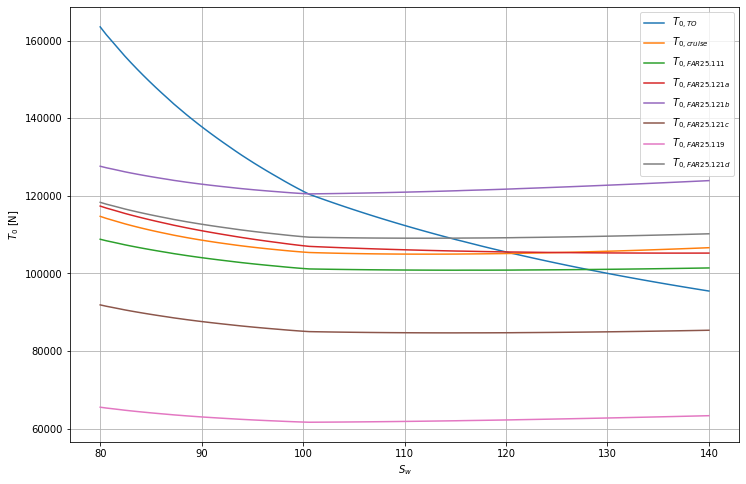

In [15]:
plt.figure(figsize=(12,8))
plt.grid(True)
label = ["$T_{0,TO}$", "$T_{0,cruise}$",  "$T_{0,FAR25.111}$", "$T_{0,FAR25.121a}$", "$T_{0,FAR25.121b}$", "$T_{0,FAR25.121c}$", "$T_{0,FAR25.119}$", "$T_{0,FAR25.121d}$"]
for i in range(8):
    plt.plot(Sw, T0_vec[i, :], label=label[i])

plt.xlabel("$S_w$")
plt.ylabel("$T_0$ [N]")
plt.legend()
plt.savefig("fig.png", dpi=200)
plt.show()